In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ELA_results = pd.read_csv('../data/English_Language_Arts__ELA__Test_Results_2013-2023_20240501.csv')

In [3]:
ELA_results.sample(5)

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
278875,School,02M212,P.S. 212 MIDTOWN WEST,5,2016,White,23,341,0,0.0,3,13.0,9,39.1,11,47.8,20,87.0
483554,School,10X159,P.S. 159 LUIS MUNOZ MARIN BILING,4,2023,Male,6,453,0,0.0,2,33.3,3,50.0,1,16.7,4,66.7
426767,School,28Q161,P.S. 161 ARTHUR ASHE SCHOOL,4,2019,Asian,57,605,3,5.3,19,33.3,24,42.1,11,19.3,35,61.4
329532,School,11X083,P.S. 083 DONALD HERTZ,3,2013,Asian,26,311,8,30.8,7,26.9,9,34.6,2,7.7,11,42.3
282346,School,02M413,SCHOOL OF THE FUTURE HIGH SCHOOL,6,2013,Asian,11,325,0,0.0,5,45.5,4,36.4,2,18.2,6,54.5


In [4]:
ELA_results['Year'].unique

<bound method Series.unique of 0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
626457    2014
626458    2013
626459    2013
626460    2013
626461    2013
Name: Year, Length: 626462, dtype: int64>

# Column Description 
- 'Report Category' - The high-level grouping for each report: Citywide,Borough,District,School
- 'Geographic Subdivision' - The individual schools or geographic subregion for each of the main categories  
- 'School Name' - Name of the school
- 'Grade' - School grade which test was administered: All Grades, 3-8 grades
- 'Year' - Year test was administered
- 'Student Category' - Reflects the set of students which were tested;
    - All Students 
    - SWD (Students with Disability): Not SWD, SWD
    - Ethnicity: Asian, Black, Hispanic, Multi-Racial, Native American, White
    - Gender: Female, Male, Neither Female nor Male
    - Gender by Ethnicity: F or M Asian, F or M Black, F or M Hispanic, F or M Multi-Racial, F or M Native American, F or M White
    - Econ Status (economic status): Econ Disadv, Not Econ Disadv
    - ELL (English Language Learner): Current ELL, Ever ELL, Never ELL
- 'Number Tested' - Total number of students tested 
- 'Mean Scale Score' - Average total students tested
- 'Num Level 1' - Number of students who scored in Level 1 range: 1 = Not Meeting Learning Standards
- 'Pct Level 1' - Percentage of students who scored in Level 1 range  
- 'Num Level 2' - Number of students who scored in Level 2 range: 2 = Partially Meeting Learning Standards
- 'Pct Level 2' - Percentage of students who scored in Level 2 range
- 'Num Level 3' - Number of students who scored in Level 3 range: 3 = Meeting Learning Standards
- 'Pct Level 3' - Percentage of students who scored in Level 3 range 
- 'Num Level 4' - Number of students who scored in Level 4 range: 4 = Meeting Learning Standards with Distinction  
- 'Pct Level 4' - Percentage of students who scored in Level 4 range
- 'Num Level 3 and 4' - Number of students who scored in Level 3 and 4 range combined: Level 3 and 4 combined
- 'Pct Level 3 and 4' - Percentage of students who scored in Level 3 and 4 range combined

In [5]:
ELA_results.columns

Index(['Report Category', 'Geographic Subdivision', 'School Name', 'Grade',
       'Year', 'Student Category', 'Number Tested', 'Mean Scale Score',
       'Num Level 1', 'Pct Level 1', 'Num Level 2', 'Pct Level 2',
       'Num Level 3', 'Pct Level 3', 'Num Level 4', 'Pct Level 4',
       'Num Level 3 and 4', 'Pct Level 3 and 4'],
      dtype='object')

In [6]:
ELA_results.rename(columns={'Geographic Subdivision':'DBN'}, inplace=True)

In [7]:
ELA_results['Report Category'].unique()

array(['Citywide', 'School', 'District', 'Borough'], dtype=object)

In [8]:
# School with Highest Economic Need  - 12X211 - HEN
# School with Lowest Economic Need  - 02M183 - LEN

ELA_results[ELA_results['DBN'] == '12X211'].sample(5)

,Report Category,DBN,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
490364,School,12X211,P.S. 211,6,2019,Male,21,586,10,47.6,7,33.3,2,9.5,2,9.5,4,19.0
203358,School,12X211,P.S. 211,5,2015,Ever ELL,2,s,s,s,s,s,s,s,s,s,s,s
490358,School,12X211,P.S. 211,3,2019,Male,20,582,9,45.0,8,40.0,3,15.0,0,0.0,3,15.0
574315,School,12X211,P.S. 211,5,2019,SWD,12,574,9,75.0,2,16.7,1,8.3,0,0.0,1,8.3
490342,School,12X211,P.S. 211,All Grades,2023,Male,41,426,23,56.1,14,34.1,4,9.8,0,0.0,4,9.8


In [9]:
ELA_results[(ELA_results['DBN'] == '12X211') & 
        (ELA_results['Grade'] == 'All Grades') & 
        (ELA_results['Student Category'] == 'All Students')
        ].head(5)

,Report Category,DBN,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
54444,School,12X211,P.S. 211,All Grades,2023,All Students,85,430,41,48.2,33,38.8,11,12.9,0,0.0,11,12.9
54451,School,12X211,P.S. 211,All Grades,2022,All Students,227,590,100,44.1,68,30.0,49,21.6,10,4.4,59,26.0
54458,School,12X211,P.S. 211,All Grades,2019,All Students,347,587,142,40.9,135,38.9,47,13.5,23,6.6,70,20.2
54465,School,12X211,P.S. 211,All Grades,2018,All Students,348,587,168,48.3,103,29.6,54,15.5,23,6.6,77,22.1
54472,School,12X211,P.S. 211,All Grades,2017,All Students,318,286,134,42.1,125,39.3,53,16.7,6,1.9,59,18.6


In [10]:
hen_results = ELA_results[
    (ELA_results['DBN'] == '12X211') & 
    (ELA_results['Grade'] == 'All Grades') & 
    (ELA_results['Student Category'] == 'All Students')
].copy()

hen_results.set_index('Year', inplace=True)

In [11]:
hen_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2023 to 2013
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Report Category    9 non-null      object
 1   DBN                9 non-null      object
 2   School Name        9 non-null      object
 3   Grade              9 non-null      object
 4   Student Category   9 non-null      object
 5   Number Tested      9 non-null      int64 
 6   Mean Scale Score   9 non-null      object
 7   Num Level 1        9 non-null      object
 8   Pct Level 1        9 non-null      object
 9   Num Level 2        9 non-null      object
 10  Pct Level 2        9 non-null      object
 11  Num Level 3        9 non-null      object
 12  Pct Level 3        9 non-null      object
 13  Num Level 4        9 non-null      object
 14  Pct Level 4        9 non-null      object
 15  Num Level 3 and 4  9 non-null      object
 16  Pct Level 3 and 4  9 non-null      object
dtype

In [12]:
hen_results['Pct Level 4'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [13]:
hen_results['Pct Level 4'] = pd.to_numeric(ELA_results['Pct Level 4'], errors='coerce')

In [14]:
hen_results['Pct Level 4'].apply(type).unique()

array([<class 'float'>], dtype=object)

In [15]:
hen_results['Pct Level 4'].describe()

count     9.000000
mean     11.822222
std       4.693553
min       4.600000
25%       6.800000
50%      13.300000
75%      15.300000
max      17.300000
Name: Pct Level 4, dtype: float64

In [16]:
# converting to float
columns_to_convert = [
    "Mean Scale Score",
    "Num Level 1",
    "Pct Level 1",
    "Num Level 2",
    "Pct Level 2",
    "Num Level 3",
    "Pct Level 3",
    "Num Level 4",
    "Num Level 3 and 4",
    "Pct Level 3 and 4"
]

hen_results[columns_to_convert] = hen_results[columns_to_convert].apply(pd.to_numeric, errors='coerce')

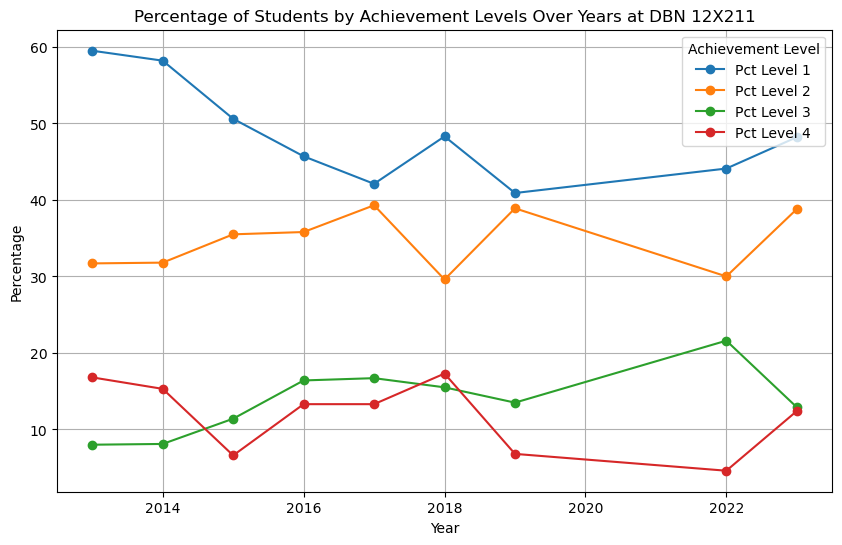

In [17]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hen_results.index, hen_results['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(hen_results.index, hen_results['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(hen_results.index, hen_results['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(hen_results.index, hen_results['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Achievement Levels Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

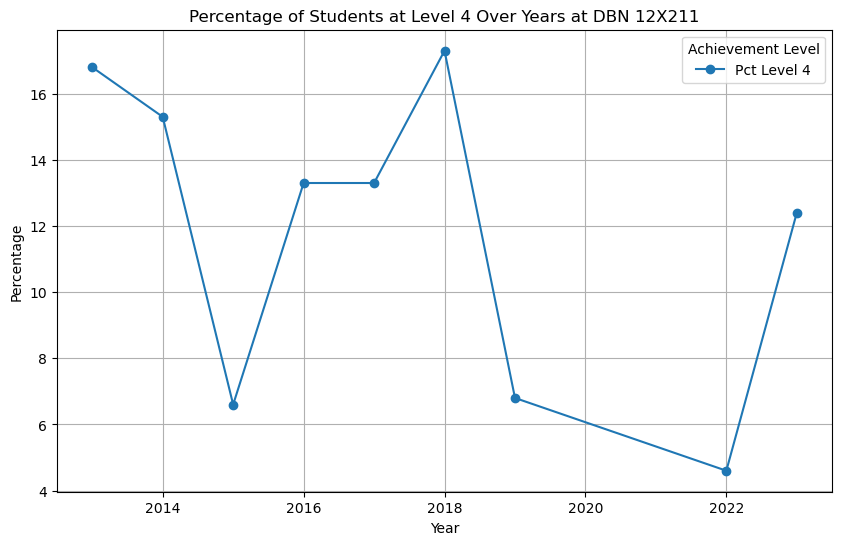

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(hen_results['Pct Level 4'], marker='o', linestyle='-', label='Pct Level 4')

plt.title('Percentage of Students at Level 4 Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

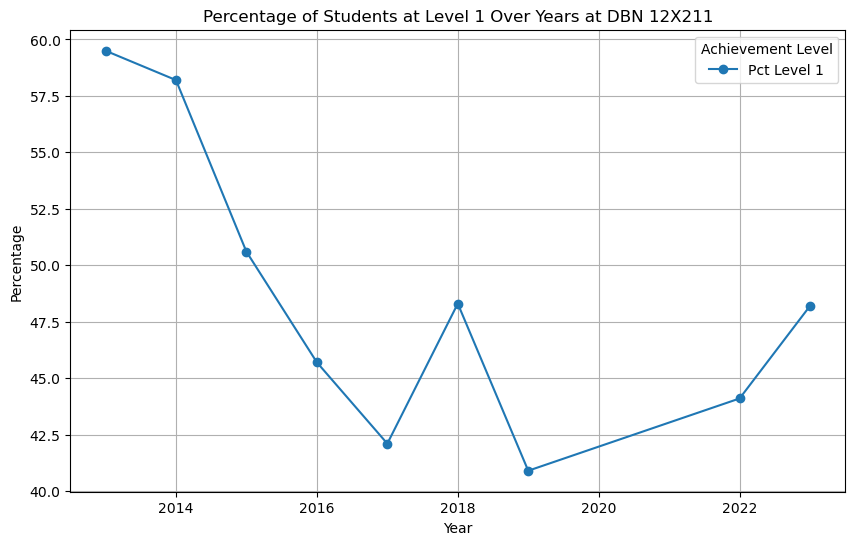

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(hen_results.index, hen_results['Pct Level 1'], marker='o', label='Pct Level 1')

plt.title('Percentage of Students at Level 1 Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [20]:
hen_results.index.unique()

Index([2023, 2022, 2019, 2018, 2017, 2016, 2015, 2014, 2013], dtype='int64', name='Year')

# important notes from dataset
- "Due to COVID-19 pandemic, the exams were not administered in 2020" and were optional for students to take in 2021
- in 2018, NYSED rescaled the Math and ELA exams to account for a change in test administration from 3 days to 2 days
- results from 2018 - 2022 can be compared to each other but cannot be compared to prior years (or to 2023)
- exams were cancelled in 2020 and voluntary in 2021 
- 21% of eligible students took the exam in 2021, no data for those years is included  


In [21]:
# School with Lowest Economic Need  - 02M183

ELA_results[(ELA_results['DBN'] == '02M183') & 
        (ELA_results['Grade'] == 'All Grades') & 
        (ELA_results['Student Category'] == 'All Students')
        ].head(5)

,Report Category,DBN,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
40122,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2023,All Students,194,472,8,4.1,18,9.3,54,27.8,114,58.8,168,86.6
40126,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2022,All Students,202,620,8,4.0,17,8.4,78,38.6,99,49.0,177,87.6
40130,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2019,All Students,227,619,11,4.8,13,5.7,106,46.7,97,42.7,203,89.4
40134,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2018,All Students,233,621,4,1.7,26,11.2,87,37.3,116,49.8,203,87.1
40138,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2017,All Students,224,341,11,4.9,29,12.9,90,40.2,94,42.0,184,82.1


In [22]:
len_results = ELA_results[
    (ELA_results['DBN'] == '02M183') & 
    (ELA_results['Grade'] == 'All Grades') & 
    (ELA_results['Student Category'] == 'All Students')
].copy()

len_results.set_index('Year', inplace=True)

In [23]:
len_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2023 to 2013
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Report Category    9 non-null      object
 1   DBN                9 non-null      object
 2   School Name        9 non-null      object
 3   Grade              9 non-null      object
 4   Student Category   9 non-null      object
 5   Number Tested      9 non-null      int64 
 6   Mean Scale Score   9 non-null      object
 7   Num Level 1        9 non-null      object
 8   Pct Level 1        9 non-null      object
 9   Num Level 2        9 non-null      object
 10  Pct Level 2        9 non-null      object
 11  Num Level 3        9 non-null      object
 12  Pct Level 3        9 non-null      object
 13  Num Level 4        9 non-null      object
 14  Pct Level 4        9 non-null      object
 15  Num Level 3 and 4  9 non-null      object
 16  Pct Level 3 and 4  9 non-null      object
dtype

In [24]:
# converting to float
columns_to_convert = [
    "Mean Scale Score",
    "Num Level 1",
    "Pct Level 1",
    "Num Level 2",
    "Pct Level 2",
    "Num Level 3",
    "Pct Level 3",
    "Num Level 4",
    "Pct Level 4",
    "Num Level 3 and 4",
    "Pct Level 3 and 4"
]

len_results[columns_to_convert] = len_results[columns_to_convert].apply(pd.to_numeric, errors='coerce')

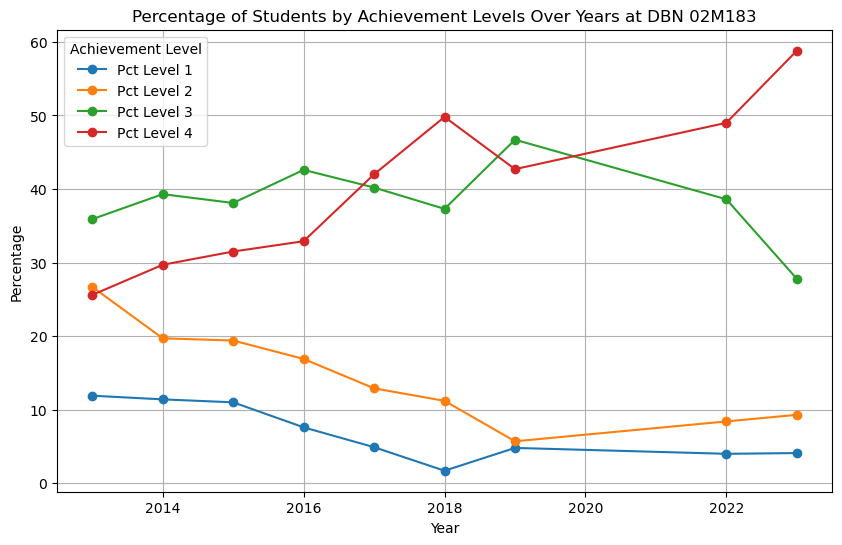

In [25]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(len_results.index, len_results['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(len_results.index, len_results['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(len_results.index, len_results['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(len_results.index, len_results['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Achievement Levels Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

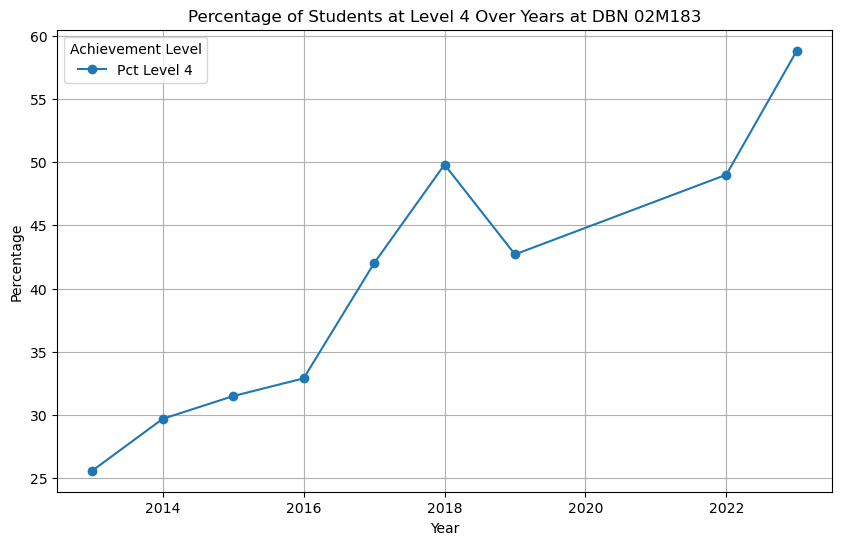

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(len_results['Pct Level 4'], marker='o', linestyle='-', label='Pct Level 4')

plt.title('Percentage of Students at Level 4 Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

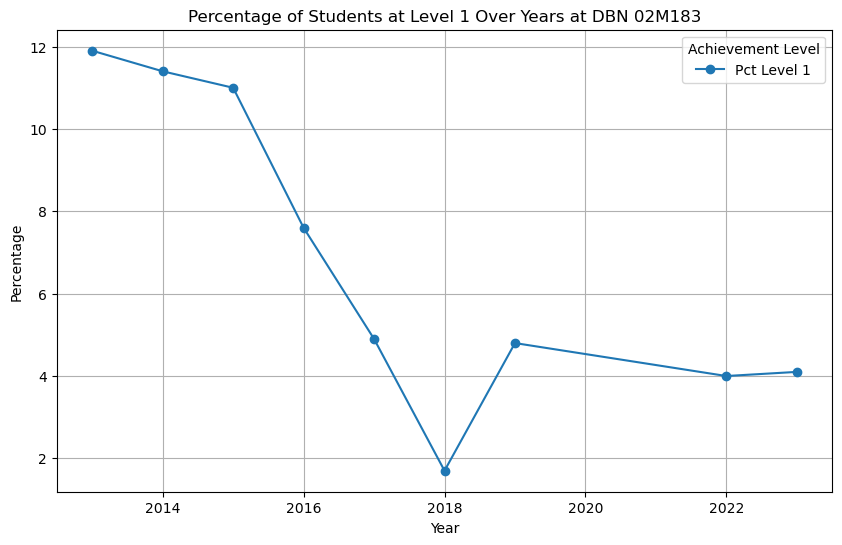

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(len_results.index, len_results['Pct Level 1'], marker='o', label='Pct Level 1')

plt.title('Percentage of Students at Level 1 Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [28]:
# School with Highest Economic Need Index - 12X211
# School with Lowest Economic Need  - 02M183

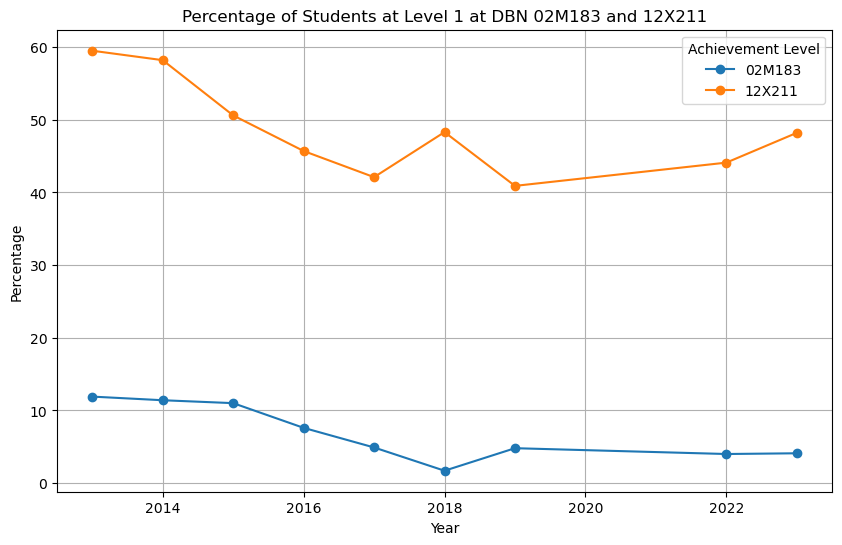

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(len_results.index, len_results['Pct Level 1'], marker='o', label='02M183')
plt.plot(len_results.index, hen_results['Pct Level 1'], marker='o', label='12X211')


plt.title('Percentage of Students at Level 1 at DBN 02M183 and 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

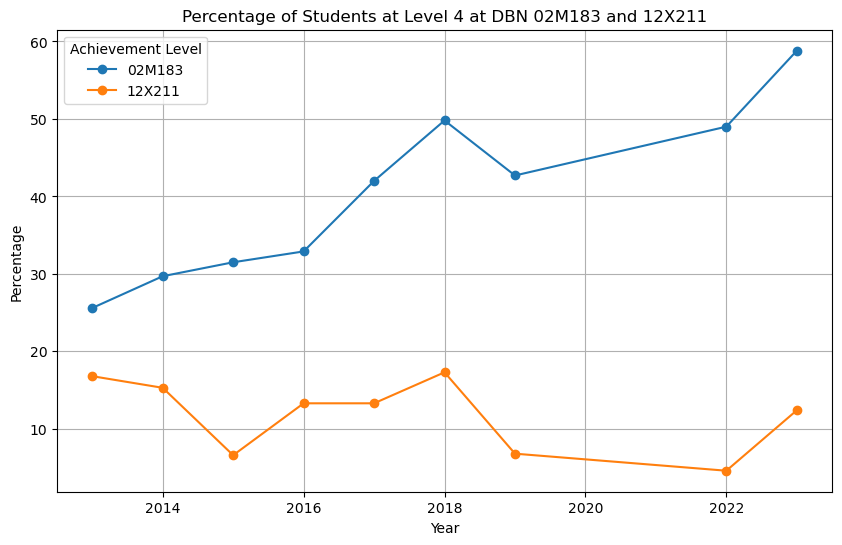

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(len_results.index, len_results['Pct Level 4'], marker='o', label='02M183')
plt.plot(len_results.index, hen_results['Pct Level 4'], marker='o', label='12X211')


plt.title('Percentage of Students at Level 4 at DBN 02M183 and 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [31]:
ELA_results[(ELA_results['Report Category'] == 'Citywide') & 
        (ELA_results['Grade'] == 'All Grades') & 
        (ELA_results['Student Category'] == 'All Students')
        ].head(5)

,Report Category,DBN,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
6,Citywide,Citywide,NaN,All Grades,2023,All Students,313083,450,71620,22.9,79546,25.4,93084,29.7,68833,22.0,161917,51.7
13,Citywide,Citywide,NaN,All Grades,2022,All Students,322720,602,72571,22.5,92032,28.5,86216,26.7,71901,22.3,158117,49.0
20,Citywide,Citywide,NaN,All Grades,2019,All Students,392460,600,96610,24.6,109877,28.0,108579,27.7,77394,19.7,185973,47.4
27,Citywide,Citywide,NaN,All Grades,2018,All Students,396502,601,93331,23.5,118086,29.8,109742,27.7,75343,19.0,185085,46.7
34,Citywide,Citywide,NaN,All Grades,2017,All Students,397448,306,102571,25.8,133475,33.6,102148,25.7,59254,14.9,161402,40.6


In [32]:
ELA_results.drop(columns=['School Name'], inplace=True)

In [33]:
ELA_results['Report Category'].unique()

array(['Citywide', 'School', 'District', 'Borough'], dtype=object)

In [34]:
ELA_results_districts = ELA_results[(ELA_results['Report Category'] == 'District') &
            (ELA_results['Grade'] == 'All Grades') & 
            (ELA_results['Student Category'] == 'All Students')
            ].copy()

In [35]:
ELA_results_districts.rename(columns={'DBN':'District'}, inplace=True)

In [36]:
ELA_results_districts.drop(columns=['Report Category'], inplace=True)

In [37]:
ELA_results_districts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 6766 to 8780
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   District           288 non-null    object
 1   Grade              288 non-null    object
 2   Year               288 non-null    int64 
 3   Student Category   288 non-null    object
 4   Number Tested      288 non-null    int64 
 5   Mean Scale Score   288 non-null    object
 6   Num Level 1        288 non-null    object
 7   Pct Level 1        288 non-null    object
 8   Num Level 2        288 non-null    object
 9   Pct Level 2        288 non-null    object
 10  Num Level 3        288 non-null    object
 11  Pct Level 3        288 non-null    object
 12  Num Level 4        288 non-null    object
 13  Pct Level 4        288 non-null    object
 14  Num Level 3 and 4  288 non-null    object
 15  Pct Level 3 and 4  288 non-null    object
dtypes: int64(2), object(14)
memory usage: 38.2+ K

In [38]:
columns_to_convert = [
    "Mean Scale Score",
    "Num Level 1",
    "Pct Level 1",
    "Num Level 2",
    "Pct Level 2",
    "Num Level 3",
    "Pct Level 3",
    "Num Level 4",
    "Pct Level 4",
    "Num Level 3 and 4",
    "Pct Level 3 and 4"
]

ELA_results_districts[columns_to_convert] = ELA_results_districts[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [39]:
ELA_results_districts

,District,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
6766,1,All Grades,2023,All Students,3168,455,534,16.9,746,23.5,882,27.8,1006,31.8,1888,59.6
6773,1,All Grades,2022,All Students,3283,605,650,19.8,871,26.5,793,24.2,969,29.5,1762,53.7
6780,1,All Grades,2019,All Students,4103,605,794,19.4,1055,25.7,1079,26.3,1175,28.6,2254,54.9
6787,1,All Grades,2018,All Students,4183,606,789,18.9,1129,27.0,1137,27.2,1128,27.0,2265,54.1
6794,1,All Grades,2017,All Students,4255,313,871,20.5,1336,31.4,1116,26.2,932,21.9,2048,48.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,32,All Grades,2017,All Students,5875,296,2010,34.2,2223,37.8,1179,20.1,463,7.9,1642,27.9
8759,32,All Grades,2016,All Students,6267,296,2220,35.4,2340,37.3,1273,20.3,434,6.9,1707,27.2
8766,32,All Grades,2015,All Students,6612,289,2842,43.0,2488,37.6,1002,15.2,280,4.2,1282,19.4
8773,32,All Grades,2014,All Students,7049,287,3140,44.5,2643,37.5,1022,14.5,244,3.5,1266,18.0


In [40]:
# grouping the districts and year 
ELA_results_districts = ELA_results_districts.groupby(['District', 'Year']).agg({
    'Number Tested': 'sum',
    'Num Level 1': 'sum',
    'Pct Level 1': 'mean',
    'Num Level 2': 'sum',
    'Pct Level 2': 'mean',
    'Num Level 3': 'sum',
    'Pct Level 3': 'mean',
    'Num Level 4': 'sum',
    'Pct Level 4': 'mean',
    'Num Level 3 and 4': 'sum',
    'Pct Level 3 and 4': 'mean'
}).reset_index()

In [41]:
ELA_results_districts['District'].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '4', '5', '6', '7', '8', '9'], dtype=object)

In [42]:
ELA_results_districts.replace([np.inf, -np.inf], np.nan, inplace=True)

In [43]:
ELA_results_districts.dropna(subset=['Pct Level 1'], inplace=True)

c:\Users\Michael\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Michael\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


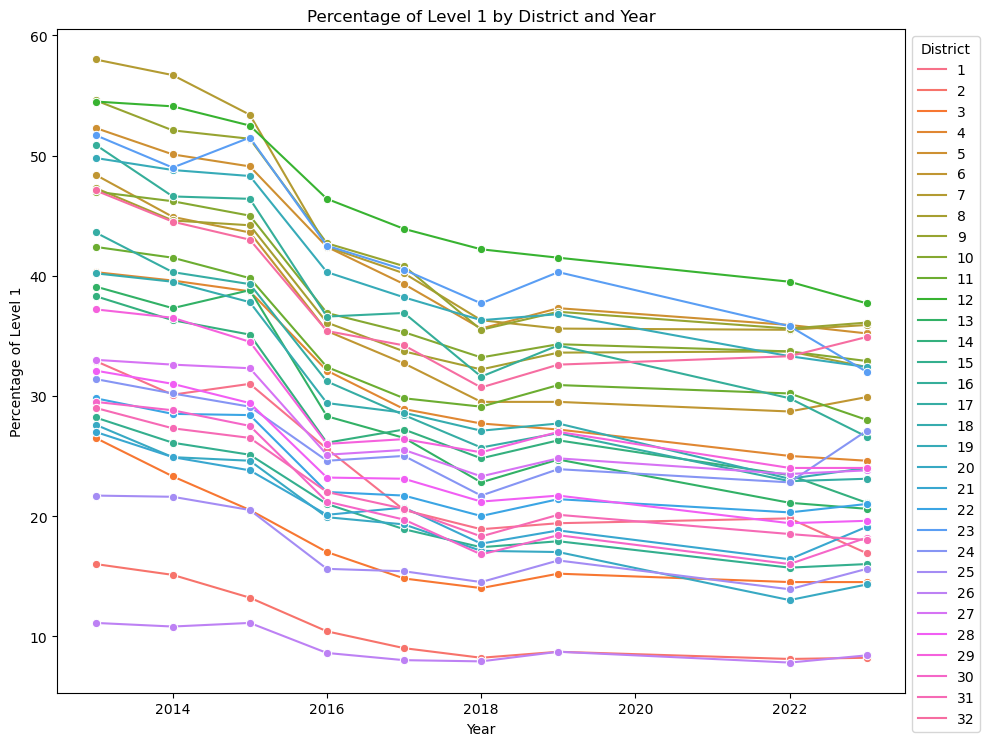

In [44]:
ELA_results_districts.sort_values(by='District', inplace=True)
district_order = sorted(ELA_results_districts['District'].unique(), key=lambda x: int(x))

plt.figure(figsize=(10, 8))
sns.lineplot(data=ELA_results_districts, x='Year', y='Pct Level 1', hue='District', marker='o', hue_order=district_order)
plt.title('Percentage of Level 1 by District and Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Level 1')
plt.legend(title='District', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

c:\Users\Michael\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Michael\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


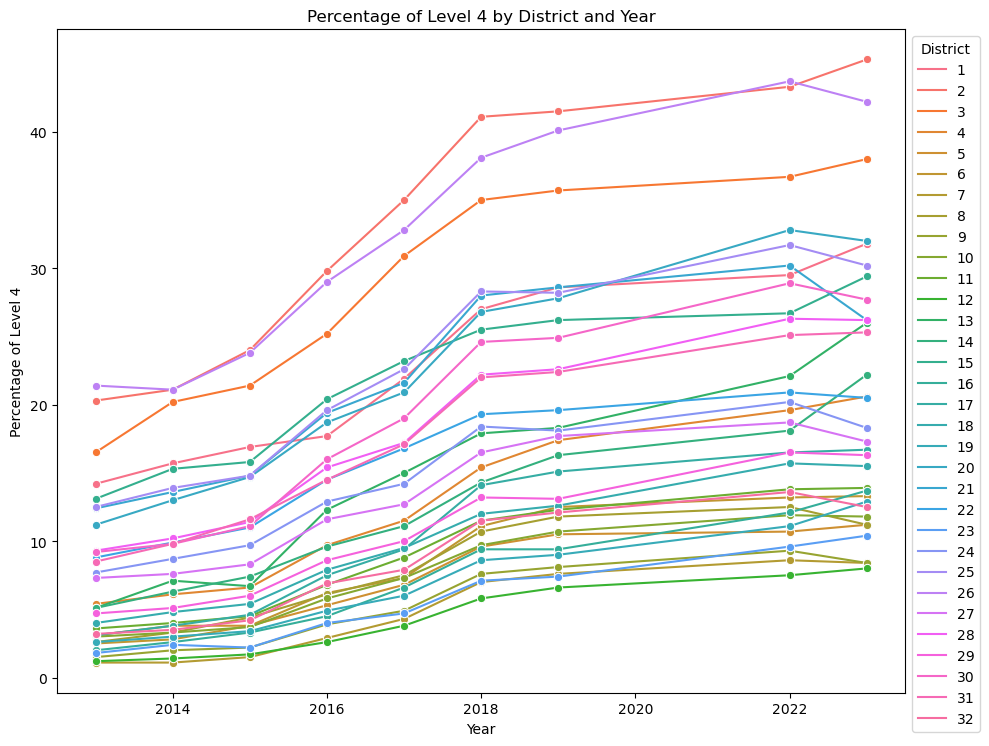

In [45]:
ELA_results_districts.replace([np.inf, -np.inf], np.nan, inplace=True)
ELA_results_districts.dropna(subset=['Pct Level 4'], inplace=True)
ELA_results_districts.sort_values(by='District', inplace=True)
district_order = sorted(ELA_results_districts['District'].unique(), key=lambda x: int(x))

# Level 4 by District and Year
plt.figure(figsize=(10, 8))
sns.lineplot(data=ELA_results_districts, x='Year', y='Pct Level 4', hue='District', marker='o', hue_order=district_order)
plt.title('Percentage of Level 4 by District and Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Level 4')
plt.legend(title='District', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
ELA_results_Citywide = ELA_results[
    (ELA_results['Report Category'] == 'Citywide') & 
    (ELA_results['Grade'] == 'All Grades') & 
    (ELA_results['Student Category'] == 'All Students') 
].copy()

ELA_results_Citywide.set_index('Year', inplace=True)

In [47]:
ELA_results_Citywide = ELA_results_Citywide.drop(columns=['DBN','Grade','Number Tested','Num Level 1','Num Level 2','Num Level 3','Num Level 4','Num Level 3 and 4'])

In [48]:
columns_to_convert = [
    "Mean Scale Score",
    "Pct Level 1",
    "Pct Level 2",
    "Pct Level 3",
    "Pct Level 4",
    "Pct Level 3 and 4"
]

ELA_results_Citywide[columns_to_convert] = ELA_results_Citywide[columns_to_convert].apply(pd.to_numeric, errors='coerce')

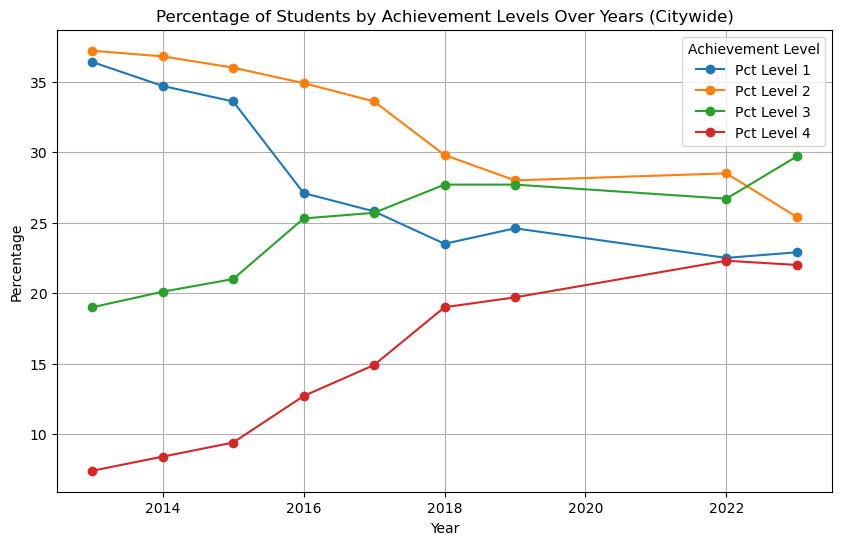

In [49]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ELA_results_Citywide.index, ELA_results_Citywide['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(ELA_results_Citywide.index, ELA_results_Citywide['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(ELA_results_Citywide.index, ELA_results_Citywide['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(ELA_results_Citywide.index, ELA_results_Citywide['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Achievement Levels Over Years (Citywide)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

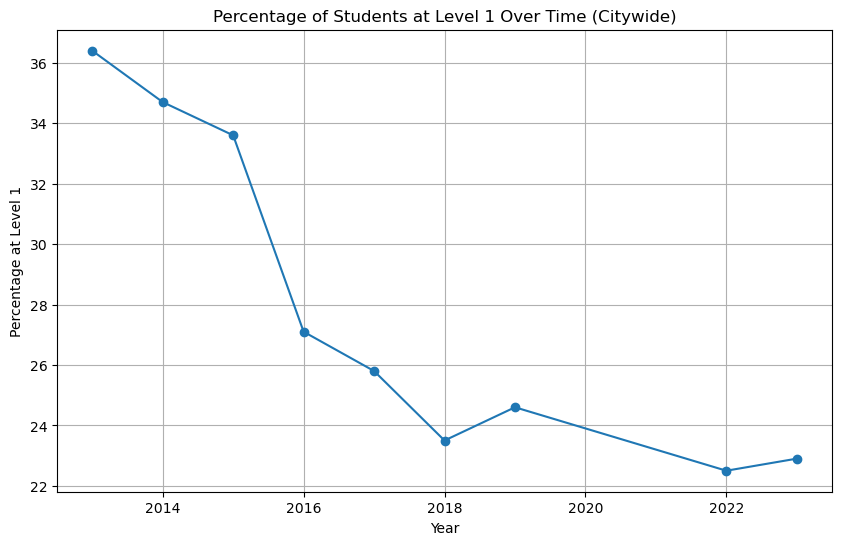

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(ELA_results_Citywide.index, ELA_results_Citywide['Pct Level 1'], marker='o', linestyle='-')
plt.title('Percentage of Students at Level 1 Over Time (Citywide)')
plt.xlabel('Year')
plt.ylabel('Percentage at Level 1')
plt.grid(True)
plt.show()

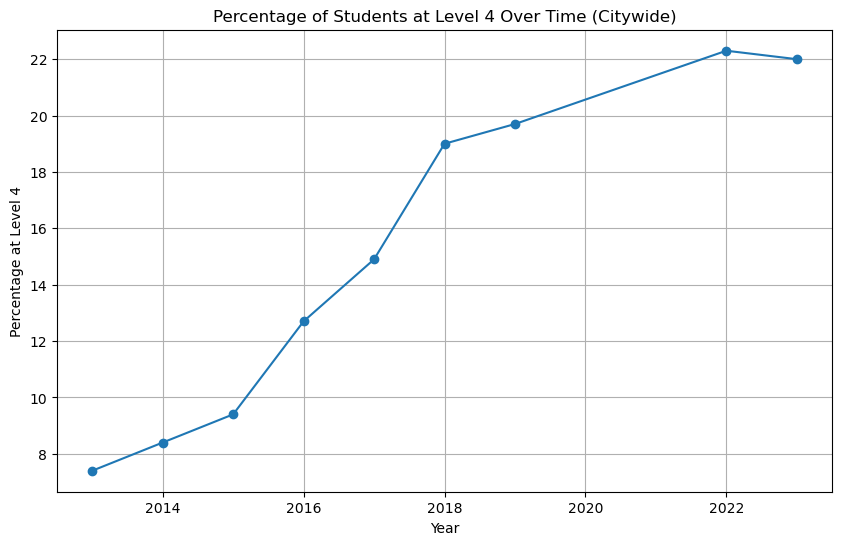

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(ELA_results_Citywide.index, ELA_results_Citywide['Pct Level 4'], marker='o', linestyle='-')
plt.title('Percentage of Students at Level 4 Over Time (Citywide)')
plt.xlabel('Year')
plt.ylabel('Percentage at Level 4')
plt.grid(True)
plt.show()

In [52]:
ELA_results_Citywide = ELA_results_Citywide.reset_index()

In [53]:
ELA_results_Citywide.to_csv('transformed_ELA_results_Citywide.csv', index=False)

In [54]:
math_results= pd.read_csv('../data/Math_Test_Results_2013-2023_20240512.csv')

C:\Users\Michael\AppData\Local\Temp\ipykernel_1600\3467691374.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  math_results= pd.read_csv('../data/Math_Test_Results_2013-2023_20240512.csv')


In [55]:
math_results.columns

Index(['Report Category', 'Geographic Subdivision', 'School Name', 'Grade',
       'Year', 'Student Category', 'Number Tested', 'Mean Scale Score',
       'Num Level 1', 'Pct Level 1', 'Num Level 2', 'Pct Level 2',
       'Num Level 3', 'Pct Level 3', 'Num Level 4', 'Pct Level 4',
       'Num Level 3 and 4', 'Pct Level 3 and 4'],
      dtype='object')

In [56]:
columns_to_convert = [
    "Mean Scale Score",
    "Num Level 1",
    "Pct Level 1",
    "Num Level 2",
    "Pct Level 2",
    "Num Level 3",
    "Pct Level 3",
    "Pct Level 4",
    "Num Level 4",
    "Num Level 3 and 4",
    "Pct Level 3 and 4"
]

math_results[columns_to_convert] = math_results[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [57]:
# School with Highest Economic Need  - 12X211 - HEN
# School with Lowest Economic Need  - 02M183 - LEN

math_results[(math_results['Geographic Subdivision'] == '12X211') &
            (math_results['Grade'] == 'All Grades') &
            (math_results['Student Category'] == 'All Students') 
            ].sample(5)

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
54172,School,12X211,P.S. 211,All Grades,2017,All Students,353,286.0,166.0,47.0,125.0,35.4,46.0,13.0,16.0,4.5,62.0,17.6
54186,School,12X211,P.S. 211,All Grades,2015,All Students,363,285.0,181.0,49.9,105.0,28.9,56.0,15.4,21.0,5.8,77.0,21.2
54179,School,12X211,P.S. 211,All Grades,2016,All Students,360,287.0,167.0,46.4,119.0,33.1,45.0,12.5,29.0,8.1,74.0,20.6
54158,School,12X211,P.S. 211,All Grades,2019,All Students,358,588.0,192.0,53.6,93.0,26.0,47.0,13.1,26.0,7.3,73.0,20.4
54151,School,12X211,P.S. 211,All Grades,2022,All Students,204,586.0,120.0,58.8,45.0,22.1,23.0,11.3,16.0,7.8,39.0,19.1


In [58]:
math_results['Geographic Subdivision'].unique()

array(['Citywide', 'BRONX', 'BROOKLYN', ..., '84X717', '84X718', '84X730'],
      dtype=object)

In [59]:
hen_math_results =  math_results[
    (math_results['Geographic Subdivision'] == '12X211') &
    (math_results['Grade'] == 'All Grades') &
    (math_results['Student Category'] == 'All Students') 
].copy()

hen_math_results.set_index('Year', inplace=True)

In [60]:
hen_math_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2023 to 2013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Report Category         9 non-null      object 
 1   Geographic Subdivision  9 non-null      object 
 2   School Name             9 non-null      object 
 3   Grade                   9 non-null      object 
 4   Student Category        9 non-null      object 
 5   Number Tested           9 non-null      int64  
 6   Mean Scale Score        9 non-null      float64
 7   Num Level 1             9 non-null      float64
 8   Pct Level 1             9 non-null      float64
 9   Num Level 2             9 non-null      float64
 10  Pct Level 2             9 non-null      float64
 11  Num Level 3             9 non-null      float64
 12  Pct Level 3             9 non-null      float64
 13  Num Level 4             9 non-null      float64
 14  Pct Level 4             9 non-null      float

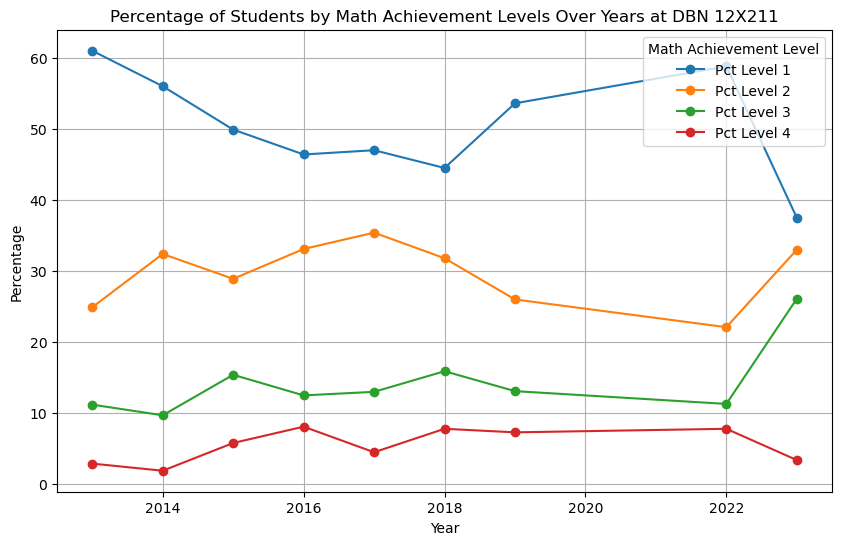

In [61]:
# Plotting (Math Results)
plt.figure(figsize=(10, 6))
plt.plot(hen_math_results.index, hen_math_results['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(hen_math_results.index, hen_math_results['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(hen_math_results.index, hen_math_results['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(hen_math_results.index, hen_math_results['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Math Achievement Levels Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Math Achievement Level')
plt.grid(True)

plt.show()

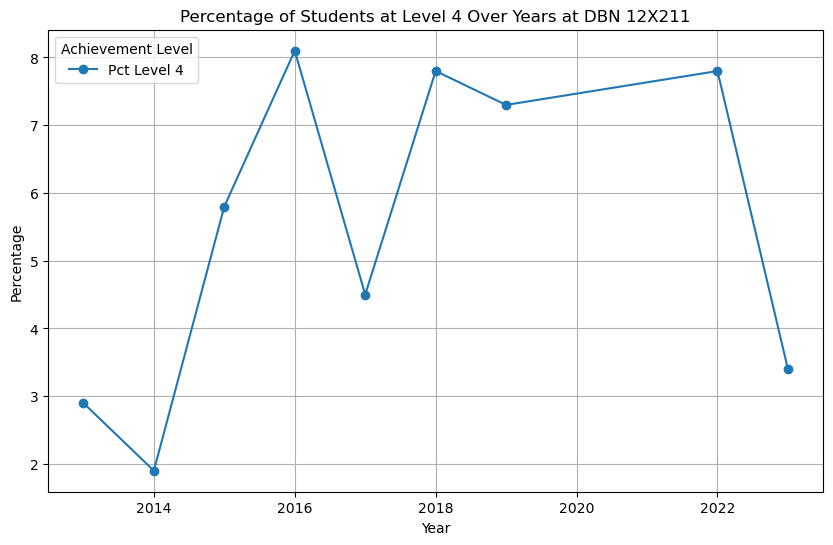

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(hen_math_results['Pct Level 4'], marker='o', linestyle='-', label='Pct Level 4')

plt.title('Percentage of Students at Level 4 Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

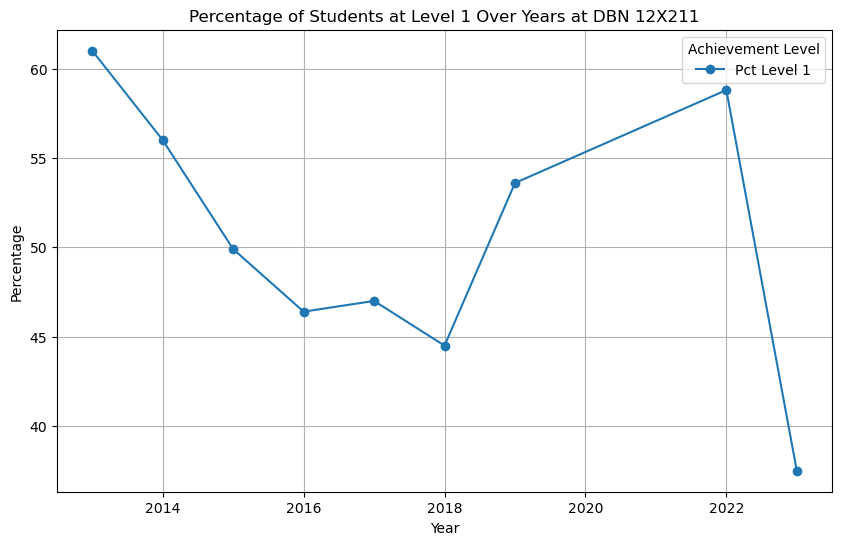

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(hen_math_results.index, hen_math_results['Pct Level 1'], marker='o', label='Pct Level 1')

plt.title('Percentage of Students at Level 1 Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [64]:
# School with Lowest Economic Need  - 02M183

math_results[(math_results['Geographic Subdivision'] == '02M183') &
            (math_results['Grade'] == 'All Grades') &
            (math_results['Student Category'] == 'All Students') 
            ].sample(5)

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
39996,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2018,All Students,238,618.0,4.0,1.7,26.0,10.9,71.0,29.8,137.0,57.6,208.0,87.4
40000,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2017,All Students,228,344.0,10.0,4.4,29.0,12.7,59.0,25.9,130.0,57.0,189.0,82.9
40008,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2015,All Students,280,332.0,30.0,10.7,45.0,16.1,86.0,30.7,119.0,42.5,205.0,73.2
40012,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2014,All Students,298,329.0,29.0,9.7,65.0,21.8,81.0,27.2,123.0,41.3,204.0,68.5
39988,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2022,All Students,203,616.0,12.0,5.9,19.0,9.4,59.0,29.1,113.0,55.7,172.0,84.7


In [65]:
len_math_results =  math_results[
    (math_results['Geographic Subdivision'] == '02M183') &
    (math_results['Grade'] == 'All Grades') &
    (math_results['Student Category'] == 'All Students') 
].copy()

len_math_results.set_index('Year', inplace=True)

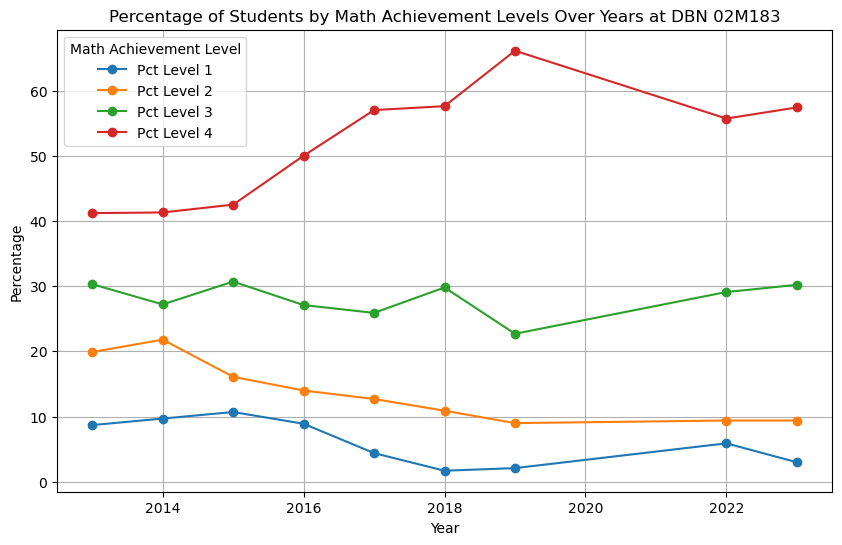

In [66]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(len_math_results.index, len_math_results['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(len_math_results.index, len_math_results['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(len_math_results.index, len_math_results['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(len_math_results.index, len_math_results['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Math Achievement Levels Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Math Achievement Level')
plt.grid(True)

plt.show()

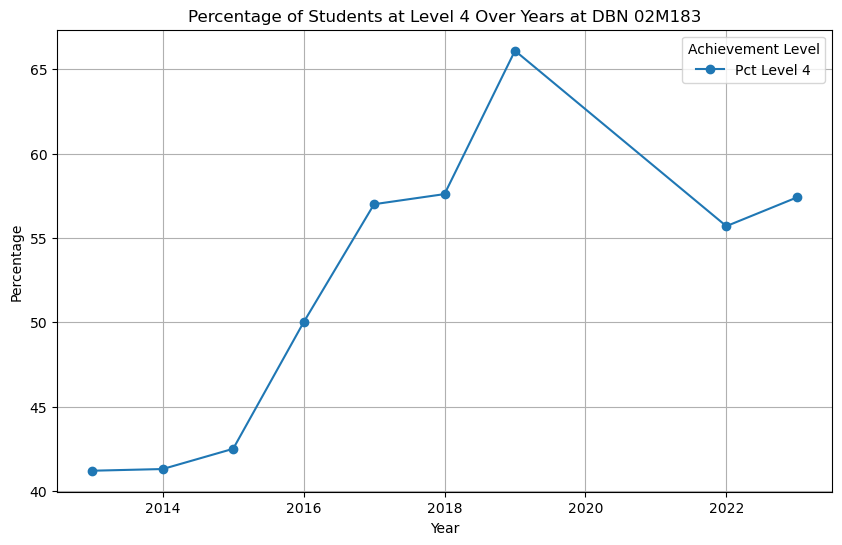

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(len_math_results['Pct Level 4'], marker='o', linestyle='-', label='Pct Level 4')

plt.title('Percentage of Students at Level 4 Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

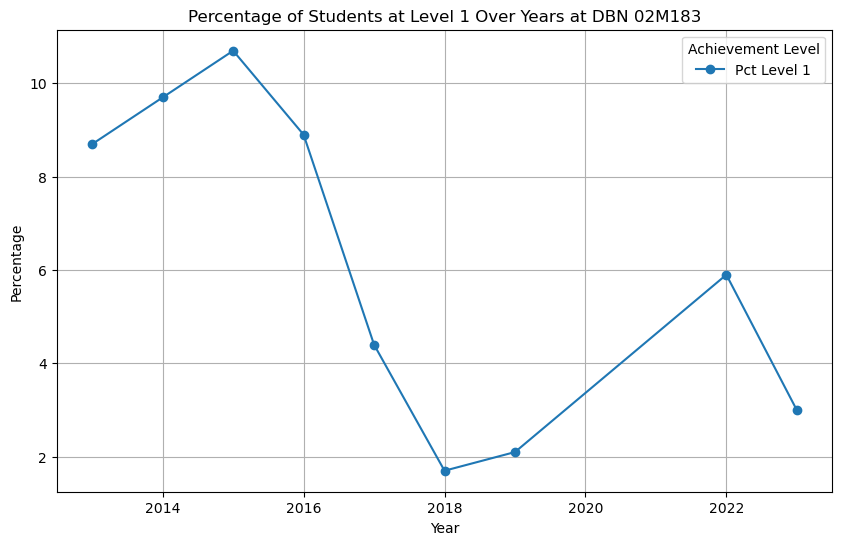

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(len_math_results.index, len_math_results['Pct Level 1'], marker='o', label='Pct Level 1')

plt.title('Percentage of Students at Level 1 Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [69]:
# School with Highest Economic Need Index - 12X211
# School with Lowest Economic Need  - 02M183

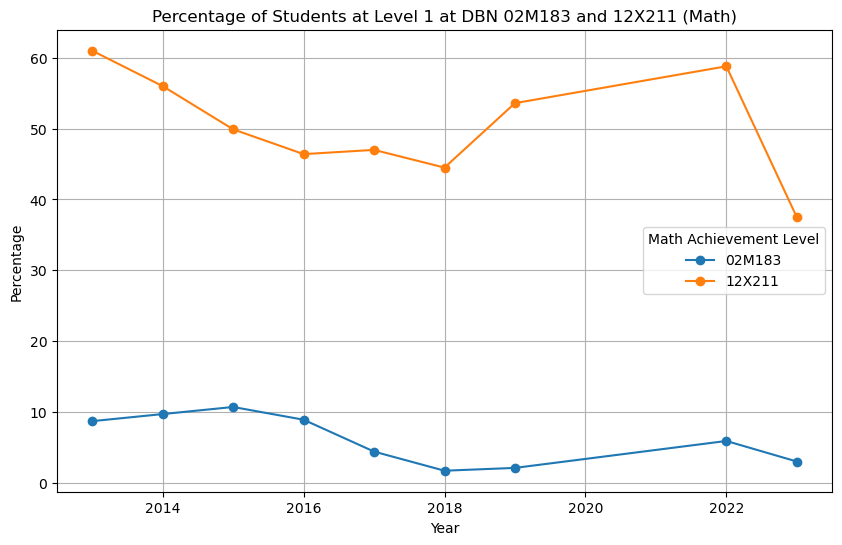

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(len_math_results.index, len_math_results['Pct Level 1'], marker='o', label='02M183')
plt.plot(len_math_results.index, hen_math_results['Pct Level 1'], marker='o', label='12X211')


plt.title('Percentage of Students at Level 1 at DBN 02M183 and 12X211 (Math)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Math Achievement Level')
plt.grid(True)

plt.show()

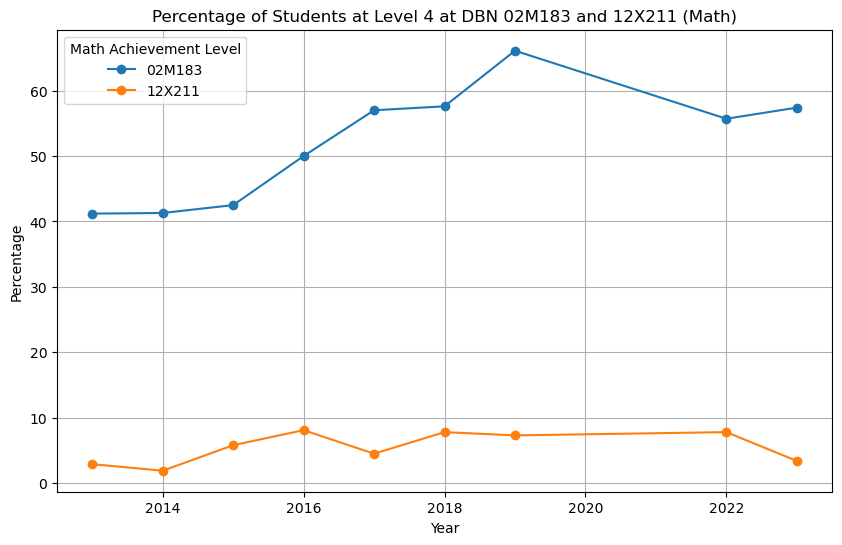

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(len_math_results.index, len_math_results['Pct Level 4'], marker='o', label='02M183')
plt.plot(len_math_results.index, hen_math_results['Pct Level 4'], marker='o', label='12X211')


plt.title('Percentage of Students at Level 4 at DBN 02M183 and 12X211 (Math)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Math Achievement Level')
plt.grid(True)

plt.show()

In [72]:
math_results_citywide = math_results[(math_results['Geographic Subdivision'] == 'Citywide') &
            (math_results['Grade'] == 'All Grades') &
            (math_results['Student Category'] == 'All Students') 
            ].copy()

math_results_citywide.set_index('Year', inplace=True)

In [73]:
math_results_citywide = math_results_citywide.drop(columns=['Geographic Subdivision','Grade','Number Tested','School Name','Num Level 1','Num Level 2','Num Level 3','Num Level 4','Num Level 3 and 4'])


In [74]:
ELA_results_Citywide

,Year,Report Category,Student Category,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4
0,2023,Citywide,All Students,450,22.9,25.4,29.7,22.0,51.7
1,2022,Citywide,All Students,602,22.5,28.5,26.7,22.3,49.0
2,2019,Citywide,All Students,600,24.6,28.0,27.7,19.7,47.4
3,2018,Citywide,All Students,601,23.5,29.8,27.7,19.0,46.7
4,2017,Citywide,All Students,306,25.8,33.6,25.7,14.9,40.6
5,2016,Citywide,All Students,304,27.1,34.9,25.3,12.7,38.0
6,2015,Citywide,All Students,298,33.6,36.0,21.0,9.4,30.4
7,2014,Citywide,All Students,296,34.7,36.8,20.1,8.4,28.4
8,2013,Citywide,All Students,296,36.4,37.2,19.0,7.4,26.4


In [75]:
math_results_citywide

,Report Category,Student Category,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4
Year,,,,,,,,
2023,Citywide,All Students,452.0,26.0,24.1,30.8,19.1,49.9
2022,Citywide,All Students,596.0,38.5,23.5,18.7,19.2,37.9
2019,Citywide,All Students,600.0,30.1,24.4,21.7,23.9,45.6
2018,Citywide,All Students,599.0,32.5,24.9,21.2,21.4,42.7
2017,Citywide,All Students,303.0,33.2,29.0,19.9,17.8,37.8
2016,Citywide,All Students,303.0,32.7,30.9,19.0,17.5,36.4
2015,Citywide,All Students,302.0,33.5,31.3,19.9,15.4,35.2
2014,Citywide,All Students,301.0,33.9,31.8,20.0,14.2,34.2
2013,Citywide,All Students,298.0,36.8,33.6,18.4,11.2,29.6


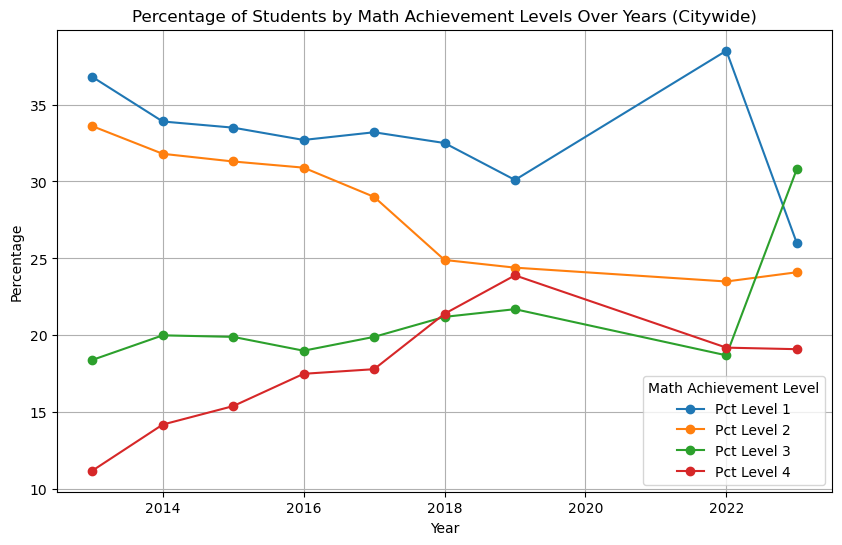

In [76]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(math_results_citywide.index, math_results_citywide['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(math_results_citywide.index, math_results_citywide['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(math_results_citywide.index, math_results_citywide['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(math_results_citywide.index, math_results_citywide['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Math Achievement Levels Over Years (Citywide)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Math Achievement Level')
plt.grid(True)

plt.show()

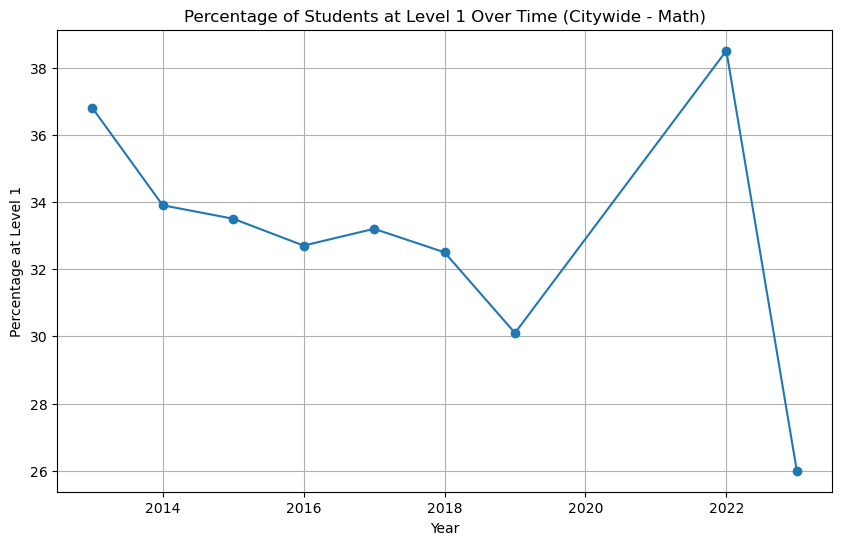

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(math_results_citywide.index, math_results_citywide['Pct Level 1'], marker='o', linestyle='-')
plt.title('Percentage of Students at Level 1 Over Time (Citywide - Math)')
plt.xlabel('Year')
plt.ylabel('Percentage at Level 1')
plt.grid(True)
plt.show()

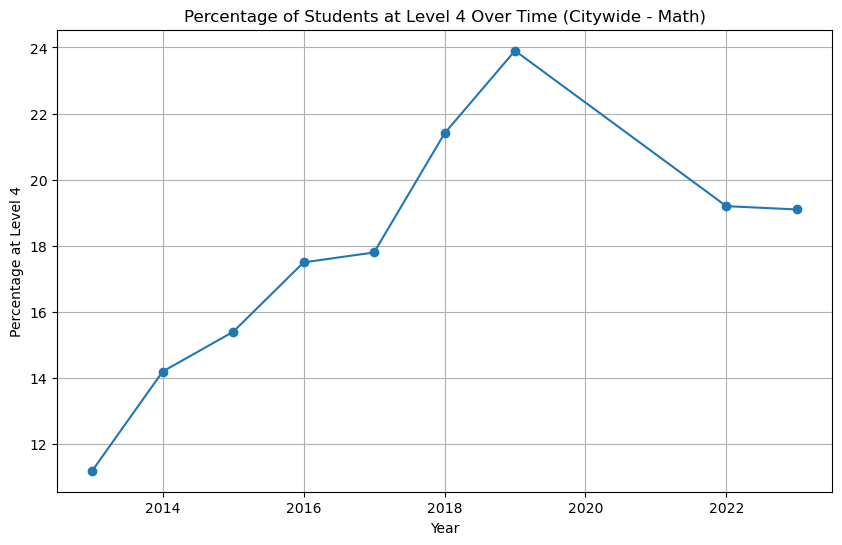

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(math_results_citywide.index, math_results_citywide['Pct Level 4'], marker='o', linestyle='-')
plt.title('Percentage of Students at Level 4 Over Time (Citywide - Math)')
plt.xlabel('Year')
plt.ylabel('Percentage at Level 4')
plt.grid(True)
plt.show()

In [79]:
math_results_citywide = math_results_citywide.reset_index()

In [80]:
math_results_citywide.to_csv('transformed_math_results_citywide.csv', index=False)

In [89]:
math_results_citywide = pd.read_csv('../transformed_data/transformed_math_results_citywide.csv')
ELA_results_Citywide = pd.read_csv('../transformed_data/transformed_ELA_results_Citywide.csv')

# adding 'Subject' column
math_results_citywide['Subject'] = 'Math'
ELA_results_Citywide['Subject'] = 'ELA'


In [90]:
ELA_results_Citywide

,Year,Report Category,Student Category,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4,Subject
0,2023,Citywide,All Students,450,22.9,25.4,29.7,22.0,51.7,ELA
1,2022,Citywide,All Students,602,22.5,28.5,26.7,22.3,49.0,ELA
2,2019,Citywide,All Students,600,24.6,28.0,27.7,19.7,47.4,ELA
3,2018,Citywide,All Students,601,23.5,29.8,27.7,19.0,46.7,ELA
4,2017,Citywide,All Students,306,25.8,33.6,25.7,14.9,40.6,ELA
5,2016,Citywide,All Students,304,27.1,34.9,25.3,12.7,38.0,ELA
6,2015,Citywide,All Students,298,33.6,36.0,21.0,9.4,30.4,ELA
7,2014,Citywide,All Students,296,34.7,36.8,20.1,8.4,28.4,ELA
8,2013,Citywide,All Students,296,36.4,37.2,19.0,7.4,26.4,ELA


In [91]:
math_results_citywide

,Year,Report Category,Student Category,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4,Subject
0,2023,Citywide,All Students,452.0,26.0,24.1,30.8,19.1,49.9,Math
1,2022,Citywide,All Students,596.0,38.5,23.5,18.7,19.2,37.9,Math
2,2019,Citywide,All Students,600.0,30.1,24.4,21.7,23.9,45.6,Math
3,2018,Citywide,All Students,599.0,32.5,24.9,21.2,21.4,42.7,Math
4,2017,Citywide,All Students,303.0,33.2,29.0,19.9,17.8,37.8,Math
5,2016,Citywide,All Students,303.0,32.7,30.9,19.0,17.5,36.4,Math
6,2015,Citywide,All Students,302.0,33.5,31.3,19.9,15.4,35.2,Math
7,2014,Citywide,All Students,301.0,33.9,31.8,20.0,14.2,34.2,Math
8,2013,Citywide,All Students,298.0,36.8,33.6,18.4,11.2,29.6,Math


In [92]:
citywide_results = pd.concat([math_results_citywide, ELA_results_Citywide], ignore_index=True)

In [94]:
citywide_results

,Year,Report Category,Student Category,Mean Scale Score,Pct Level 1,Pct Level 2,Pct Level 3,Pct Level 4,Pct Level 3 and 4,Subject
0,2023,Citywide,All Students,452.0,26.0,24.1,30.8,19.1,49.9,Math
1,2022,Citywide,All Students,596.0,38.5,23.5,18.7,19.2,37.9,Math
2,2019,Citywide,All Students,600.0,30.1,24.4,21.7,23.9,45.6,Math
3,2018,Citywide,All Students,599.0,32.5,24.9,21.2,21.4,42.7,Math
4,2017,Citywide,All Students,303.0,33.2,29.0,19.9,17.8,37.8,Math
5,2016,Citywide,All Students,303.0,32.7,30.9,19.0,17.5,36.4,Math
6,2015,Citywide,All Students,302.0,33.5,31.3,19.9,15.4,35.2,Math
7,2014,Citywide,All Students,301.0,33.9,31.8,20.0,14.2,34.2,Math
8,2013,Citywide,All Students,298.0,36.8,33.6,18.4,11.2,29.6,Math
9,2023,Citywide,All Students,450.0,22.9,25.4,29.7,22.0,51.7,ELA


In [95]:
citywide_results.to_csv('citywide_results.csv', index=False)

In [16]:
df1 = pd.read_csv('../transformed_data/citywide_results.csv')

In [19]:
df1 = df1.drop(['Report Category','Student Category','Mean Scale Score'], axis=1)

In [21]:
df1.columns

Index(['Year', 'Pct Level 1', 'Pct Level 2', 'Pct Level 3', 'Pct Level 4',
       'Pct Level 3 and 4', 'Subject'],
      dtype='object')

In [22]:
# pivot to long format for tableau
df = pd.melt(df1, id_vars=['Year', 'Subject'], 
                  value_vars=['Pct Level 1', 'Pct Level 2', 'Pct Level 3', 'Pct Level 4'], 
                  var_name='Achievement Level', 
                  value_name='Percentage')

In [25]:
# whole numbers
df['Percentage'] = df['Percentage'].astype(int)

In [26]:
df.to_csv('citywide_results_longformat.csv', index=False)